# *Ejercicio 2* - Clasificador ingenuo de Bayes para preferencias de personas

Consideremos el siguiente vector de atributos binarios:

                                          (scones, cerveza, whisky, avena, futbol)


El vector **x = (1, 0, 1, 1, 0)** significa que se trata de una persona que le gustan los scones, no toma cerveza, le gusta el whisky y la avena pero no ve futbol.

a) Implementar el clasificador ingenuo de Bayes.

b) Clasificar el ejemplo **x = (1, 0, 1, 1, 0)** determinando si corresponde a las preferencias
de una persona inglesa o escosesa.


La implementación consta por un lado de la lectura del archivo de datos, para el mismo se desarrollo una función llamada `load_person_preference("path_to_csv_file")` que levanta las preferencias binarias en forma de matriz, donde la ultima columna indica con una letra `E` o una letra `I` si la persona del registro es escosesa o inglesa respectivamente.

En cuanto al clasificador ingenuo de bayes, el mismo se implementó via el método:

```
bayesian_naive_classifier(
    training_matrix,
    matrix_to_classify,
    columns_true_values,
    comparison_function=equal_comparison
)
```
Donde `training_matrix` corresponde a la matriz para entrenar el clasificador y obtener probabilidades aproximandolas con las frecuencias relativas de los registros de dicha matriz. Por otra parte `matrix_to_classify` corresponde con la matriz compuesta por los vectores que se desean clasificar (sus columnas son las varibles y la ultima columna es la clase a la que pertenece). Luego como se implemento un clasificador que no sea necesariamente binario se envia un parametro `columns_true_values` indicando los valores de verdad para cada variable de los vectores y una función de comparasión `comparison_function` que por defecto corresponde con la igualdad. Es decir, que se podrían clasificar conjuntos de datos cuyas variables no sean solamente `{0, 1}` si por ejemplo se usa `{T, F}` se puede indicar con el argumento los valores de verdad deseados.


La implementación del clasificador comienza ordenando la matriz para agrupar todos los registros por clase y para cada clase calcula la probabilidad de la clase: `#registros_clase_i/#registros_totales` y calcula las probabilidades para la clase que son las probabilidades de cada atributo o variable dada la clase, que son aproximadas con la frecuencia relativa del atributo para esa clase y utilizando la correción de Laplace de la siguiente forma:
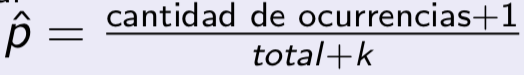
Siendo k la cantidad de clases. Luego, para cada uno de los registros a clasificar, se calcula la probabilidad de que el vector pertenezca a cada una de las posibles clases utilizando la siguiente ecuación:
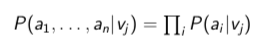
Siendo ai los atributos, V el conjunto de posibles clases. Esta ecuación asume que los valores de los atributos son independientes, dado el valor de la clase. La mayor probabilidad es la que determina la clase en la inferencia como se observa en la siguiente ecuación:
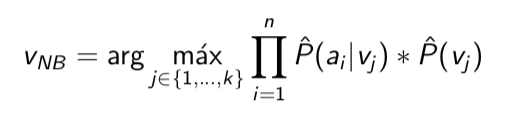
 Donde VNB es la inferencia del clasificador ingenuo de bayes.

In [2]:
from utils.data_loader import load_person_preferences
from bayesian_naive_classifier import bayesian_naive_classifier


titles, training_matrix = load_person_preferences("../data/PreferenciasBritanicos.csv")
print(bayesian_naive_classifier(training_matrix, [[1, 0, 1, 1, 0], [0, 0, 1, 0, 1]], [1, 1, 1, 1, 1]))

['E', 'I']


# *Ejercicio 3* - Clasificador de texto

Clasificador de texto utilizando el clasificador ingenuo de Bayes para el conjunto de datos ”Noticias Argentinas”.

## Selección de categorias
Categorías seleccionadas:
* **Internacional** (3850 noticias)
* **Deportes** (3855 noticias)
* **Ciencia y Tecnologia** (3856 noticias)
* **Economia** (3850 noticias)

*Nota*: se construyo otro archivo en formato CSV que tiene solamente las noticias de las categorías seleccionadas.
La matriz cuenta con el siguiente encabezado: ['fecha', 'titular', 'fuente', 'categoria'].

Para dividir el conjunto de textos disponible en un conjunto de entrenamiento y otro como conjunto test se utilizo la función .....

## Implementación


## Matriz de confusión

## Métricas de evaluación 
Calcular las medidas de evaluación Accuracy, Precision, tasa de verdaderos positivos,
tasa de falsos positivos y F1-score.

## Curvas ROC
Calcular la curva ROC.

In [ ]:
import numpy as np
from utils.data_loader import load_transformed_news_dataset
from models.news_classifier import NewsClassifier
from sklearn.model_selection import train_test_split

titles, news_data = load_transformed_news_dataset("../data/transformed_news.tsv")
train_matrix = news_data[:, :3]
categories = news_data[:, 3]
training_news, test_news, training_target, test_target = train_test_split(train_matrix, categories, train_size=0.8,
                                                                          stratify=categories)
news_classifier = NewsClassifier()
column = np.transpose
extra_column = training_target.reshape(len(training_target), 1)
training_news = np.append(training_news, extra_column, axis=1)
news_classifier.train(training_news, ignore_words=True)
result, metrics = news_classifier.classify(test_news, test_target, generate_metrics=True, output_path="../output",
                                           use_sources=False, ignore_words=False)
print(metrics.estimated_classifier_error)
print(metrics.estimated_classifier_error_relative)
print(metrics.true_positives_rate)
print(metrics.false_positives_rate)
print(metrics.recall)
print(metrics.accuracy)
print(metrics.precision)
print(metrics.f1_score)
print(metrics.matthews_correlation_coefficient)
print(metrics.roc_point)


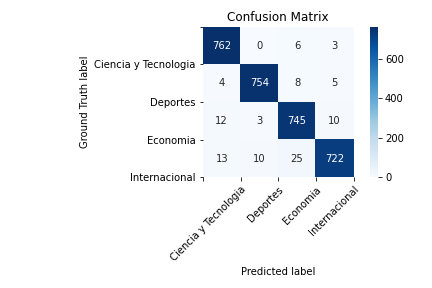


# *Ejercicio 4*
El conjunto de datos **binary.csv** contiene información de la admisión de estudiantes a una universidad.

Las variables son:

*   **admit**: toma valores 0: no fue admitido, 1 fue admitido
*   **GRE (Graduate Record Exam scores)**: variable numérica
*   **GPA (Grade Point Average)**: variable numérica
*   **rank**: variable categórica que se refiere al prestigio de la escuela secundaria a la que el alumno asistió y toma valores {1, 2, 3, 4}.

Un investigador está interesado en averiguar cómo influyen estas variables en la admisión. Discretiza las variables GRE y GPA de la siguiente manera GRE ∈ {GRE ≥ 500,GRE < 500} y GPA ∈ {GPA ≥ 3,GPA < 3}. Sabe que estas variables cumplen las relaciones presentadas en la **Figura 1**.


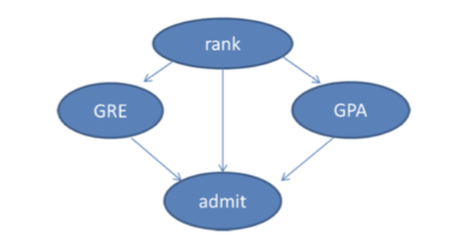
                                **Figura 1**: Relaciones entre las variables


a) Calcular la probabilidad de que una persona que proviene de una escuela con rango 1 no haya sido admitida en la universidad.

b) Calcular la probabilidad de que una persona que fue a una escuela de rango 2, tenga GRE = 450 y GPA = 3.5 sea admitida en la universidad.

c) En este ejercicio, ¿cuál es el proceso de aprendizaje?

In [ ]:
from models.bayesian_network import BayesianNetwork
from utils.data_loader import load_news_dataset, load_transformed_news_dataset, load_binary_dataset, discretize_binary_dataset

titles, matrix = load_binary_dataset("../data/binary.csv")
matrix = discretize_binary_dataset(titles, matrix)
# print(titles)
data_relations = [["rank", ["admit", "gre", "gpa"], [1, 2, 3, 4]], ["gpa", ["admit"], [0, 1]],
                  ["gre", ["admit"], [0, 1]], ["admit", [], [0, 1]]]
bayesian_network = BayesianNetwork(data_relations, matrix, titles)

probability = bayesian_network.calculate_total_generic_condicional_probability(["rank", "admit"], [1, 1], ["rank"], [1])
print(probability)
probability = bayesian_network.calculate_total_generic_condicional_probability(["rank", "gre", "gpa", "admit"],
                                                                               [2, 0, 1, 1], ["rank", "gre", "gpa"],
                                                                               [2, 0, 1])
print(probability)
